# Pandas Project. Ataques de tiburones.

## En este proyecto voy a analizar los supervivientes y fallecidos por ataques de tiburones.

Importo las librerías que voy a utilizar.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Importo el dataset con el que voy a trabajar con la función "pd.read_csv".

In [2]:
shark = pd.read_csv ('./GSAF5.csv' , encoding = ('ISO-8859-1'))
shark.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


Creo una nueva tabla, "shark2", con las columnas con las que quiero trabajar, el resto de columnas las descarto ya que no me parecen necesarias para mi análisis.

In [3]:
shark2 = shark[['Year', 'Country', 'Area', 'Activity','Sex ','Age','Fatal (Y/N)']]
shark2.head()

,Year,Country,Area,Activity,Sex,Age,Fatal (Y/N)
0,2016,USA,Florida,Surfing,M,16,N
1,2016,USA,Florida,Surfing,M,36,N
2,2016,USA,Florida,Surfing,M,43,N
3,2016,AUSTRALIA,Victoria,Surfing,M,NaN,N
4,2016,AUSTRALIA,Victoria,Surfing,M,NaN,N


He visto que el nombre de dos columnas me pueden dar problemas y las cambio el nombre con el comando ".rename".

In [4]:
shark2.rename(columns={'Sex ': 'Sex', 'Fatal (Y/N)': 'Fatal_Y_N'}, inplace=True)

C:\Users\rafae\Anaconda3\anaconda\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Compruebo que se han cambiado los nombres correctamente.

In [5]:
shark2.head()

,Year,Country,Area,Activity,Sex,Age,Fatal_Y_N
0,2016,USA,Florida,Surfing,M,16,N
1,2016,USA,Florida,Surfing,M,36,N
2,2016,USA,Florida,Surfing,M,43,N
3,2016,AUSTRALIA,Victoria,Surfing,M,NaN,N
4,2016,AUSTRALIA,Victoria,Surfing,M,NaN,N


Procedo a eliminar las filas duplicadas. Para ello utilizo el ".drop_duplicates()". En este proceso he creado una nueva tabla, "shark3", sin las filas duplicadas.

In [6]:
before = len(shark2)
shark3 = shark2.drop_duplicates()
after = len(shark3)
print('Number of duplicate records dropped: ', str(before - after))

Number of duplicate records dropped:  163


In [7]:
shark3.head()

,Year,Country,Area,Activity,Sex,Age,Fatal_Y_N
0,2016,USA,Florida,Surfing,M,16,N
1,2016,USA,Florida,Surfing,M,36,N
2,2016,USA,Florida,Surfing,M,43,N
3,2016,AUSTRALIA,Victoria,Surfing,M,NaN,N
5,2016,AUSTRALIA,Western Australia,Fishing,NaN,NaN,N


En este momento empiezo a trabajar con la columna "Fatal_Y_N". Esta columna indica el estado de las víctimas de los ataques de los tiburones. Como vemos a continuación, esta columna tiene bastante suciedad, en teoría tendría que haber Y (yes) o N (No) en función de si el ataque fue mortal o no. Pero vemos que hay distinas formas de indicar que el ataque no fue mortal, que hay espacios en blanco y aparecen "F", "#VALUE" y "UNKNOWN".

In [8]:
print(set(shark3['Fatal_Y_N']))

{nan, 'Y', 'N ', 'UNKNOWN', ' N', '#VALUE!', 'n', 'F', 'N'}


Empiezo por modificar todas las n y agruparlas en una sola "N".

In [9]:
shark3['Fatal_Y_N'] = shark2['Fatal_Y_N'].str.replace('N ', 'N').str.replace('n', 'N').str.replace(' N', 'N')
print(set(shark3['Fatal_Y_N']))

{nan, 'Y', 'UNKNOWN', '#VALUE!', 'F', 'N'}


C:\Users\rafae\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Utilicio el comnado ".value_counts()" para ver la cantidad de veces que aparece cada valor en esta columna.

In [10]:
shark3['Fatal_Y_N'].value_counts()

N          4185
Y          1532
UNKNOWN      91
#VALUE!       1
F             1
Name: Fatal_Y_N, dtype: int64

In [11]:
len(shark3)

5829

Veo que los valores que no son Y o N son pocos en comparación al total, creo que no van a ser muy significativos y me dispongo a eliminar las filas que tiene esos valores en la columna "Fatal_Y_N".

In [12]:
indexNames = shark3[ shark3['Fatal_Y_N'] == 'UNKNOWN' ].index
shark3.drop(indexNames , inplace=True)
index = shark3[ shark3['Fatal_Y_N'] == '#VALUE!' ].index
shark3.drop(index , inplace=True)
ind = shark3[ shark3['Fatal_Y_N'] == 'F' ].index
shark3.drop(ind , inplace=True)

C:\Users\rafae\Anaconda3\anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [13]:
shark3['Fatal_Y_N'].value_counts()

N    4185
Y    1532
Name: Fatal_Y_N, dtype: int64

veo que ya se han eliminado esas filas, pero no hay que olvidar que anteriormente habiamos detectado valores "nan", que quieren decir que tenemos espacios en blanco. Voy a ver cuantos espacios en blaco tengo la columna "Fatal_Y_N".

In [14]:
dif = (len(shark3)) - (4185+1532)
dif

19

In [15]:
shark3 = shark3[pd.notnull(shark3['Fatal_Y_N'])]

Al ser solo 19, decido eliminar las filas con el espacio en blanco, utilizo el comando "pd-notnull" para eliminarlas. A continuación compruebo que no tengo ninguna fila en blanco y que el total de filas de la columna se corresposde al total de "Y" y "N" que tengo.

In [16]:
dif = (len(shark3)) - (4185+1532)
dif

0

Una vez limpiada y modificada esta columna, puedo ver el porcentaje de supervivientes al ataque de un tiburón.

In [17]:
suma = 4185 + 1532
vivos = (4185*100)/suma
print ('El porcentaje de supervivientes a los ataques de tiburones es de un' , vivos , '%' )

El porcentaje de supervivientes a los ataques de tiburones es de un 73.20272870386566 %


He visto que en la gran mayoría de los ataques de los tiburones no acaban en tragedia, **¡ sobreviven el  73.20 %  de las personas que sufren un ataque de tiburón!**. A continuación lo voy representar en una grafíca circular. Para ello monto primero un dataset con los valores de los supervivientes y fallecidos.

In [18]:
A = {'Ataques de tiburones': [4185, 1532]}
df = pd.DataFrame(data=A)
df.rename(index={0:'Vivos',1:'Muertos'}, inplace=True)
df

,Ataques de tiburones
Vivos,4185
Muertos,1532


Pinto la gráfica:

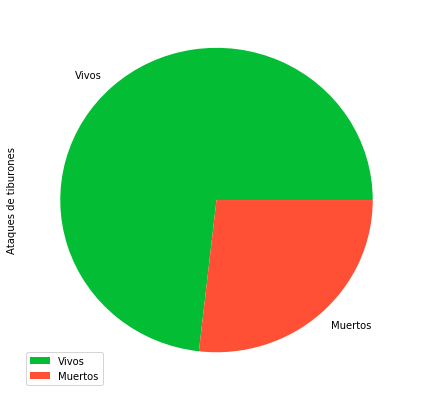

In [19]:
A = df.plot(kind='pie' , figsize= (7 , 7), colors = ['#03BE34', '#FF4F34'] ,subplots=True)

### En esta parte voy a ver la evolución de los ataques por años.

In [20]:
print(set(shark3['Year']))

{0, 5, 1543, 1580, 77, 1642, 1700, 1703, 1721, 1738, 1742, 1748, 1749, 1758, 1764, 1767, 1771, 1776, 1779, 1785, 1787, 1788, 1791, 1800, 1803, 1804, 1805, 1807, 1811, 1812, 1816, 1817, 1819, 1822, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1834, 1835, 1837, 1839, 1840, 1841, 1842, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1858, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,

Observo que tengo años incoherentes o que no me lo creo, asi que decido eliminar las filas que los errores que veo en la columna "Year".

In [21]:
ind = shark3[ shark3['Year'] == 0 ].index
shark3.drop(ind , inplace=True)
ind = shark3[ shark3['Year'] == 5 ].index
shark3.drop(ind , inplace=True)
ind = shark3[ shark3['Year'] == 77 ].index
shark3.drop(ind , inplace=True)
ind = shark3[ shark3['Year'] == 500 ].index
shark3.drop(ind , inplace=True)

In [22]:
print(set(shark3['Year']))

{1543, 1580, 1642, 1700, 1703, 1721, 1738, 1742, 1748, 1749, 1758, 1764, 1767, 1771, 1776, 1779, 1785, 1787, 1788, 1791, 1800, 1803, 1804, 1805, 1807, 1811, 1812, 1816, 1817, 1819, 1822, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1834, 1835, 1837, 1839, 1840, 1841, 1842, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1858, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 196

Como cada fila del dataset es un registo y cada registo es una ataque, uso el ".groupby" por "Year" para ver la cantidad de ataques que ha habido cada año. Creo la tabla "años" con esos registros.

In [23]:
años = shark3.groupby(['Year'])['Year'].agg(['count']).reset_index()
años.head()

,Year,count
0,1543,1
1,1580,1
2,1642,2
3,1700,3
4,1703,1


Pinto la tabla en una gráfica para poder ver mejor los ataques de los tiburones a los largo del tiempo.

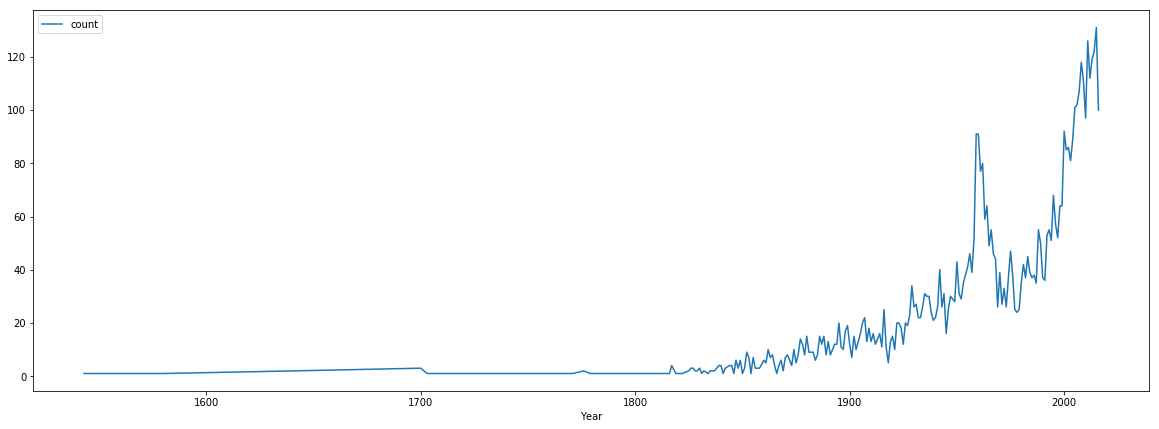

In [24]:
años.plot(x='Year', y = 'count', figsize= (20 , 7))

No me creo que los tiburones se hayan vuelto más agresivos que el paso de los siglos. Este es un dataset de registros, simplemente creo que anteriormente no había apenas registos y según ha ido evolucionando la tecnología, las comunicaciones y la forma de almacenar la información, ha ido aumentando el número de registros, pero eso no quiere decir que haya aumentado el número de ataques. Podemos observar como justo a partir de la Segunda Revolución Industrial empezaron a aumentar los resgistros de los ataques de tiburones, creo que están muy realacionados ambos hechos. Desde finales del siglo XX hay un despunte que llega hasta la actualidad, creo que es debido a la aparición de las nuevas tecnologías que hacen que cada vez haya más registros alrededor de todo el mundo.

A continuación creo una nueva tabla que divide por años los ataques entre supervivientes y fallecidos. Esta tabla no he sabido pintarla, pero la dejo ahí por si alguien tiene curiosidad y quiere cotillear con ella.

In [25]:
por_años = shark3.groupby(['Year', 'Fatal_Y_N'])['Year'].agg(['count']).reset_index()
por_años.head()

,Year,Fatal_Y_N,count
0,1543,Y,1
1,1580,Y,1
2,1642,Y,2
3,1700,N,1
4,1700,Y,2


Exporto los csv con las tablas que generado tras mi limpieza. Shark3 en el dataset principal, años y por_años son dos tablas que he sacado a partir del principal.

In [26]:
shark3.to_csv('Ataques.csv')

In [27]:
años.to_csv('años.csv')

In [28]:
por_años.to_csv('por_años.csv')

### RAFAEL EGUREN ROLLIN.